[View in Colaboratory](https://colab.research.google.com/github/camiloyatet/Curso-DeepLearning/blob/master/Proyecto2.ipynb)

#Cargue de imagenes almaceadas en Google Drive

Esta forma de cargar las imagenes de Colab fue extraido de [StackOverflow](https://stackoverflow.com/questions/49351071/load-image-dataset-folder-or-zip-located-in-google-drive-to-google-colab)

In [0]:
!apt-get install -y -qq software-properties-common python-software-properties module-init-tools
!add-apt-repository -y ppa:alessandro-strada/ppa 2>&1 > /dev/null
!apt-get update -qq 2>&1 > /dev/null
!apt-get -y install -qq google-drive-ocamlfuse fuse
!pip install livelossplot # Instalar nuevos paquetes

In [0]:
from google.colab import auth
auth.authenticate_user()

In [4]:
from oauth2client.client import GoogleCredentials
creds = GoogleCredentials.get_application_default()
import getpass
!google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret} < /dev/null 2>&1 | grep URL
vcode = getpass.getpass()
!echo {vcode} | google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret}

Please, open the following URL in a web browser: https://accounts.google.com/o/oauth2/auth?client_id=32555940559.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive&response_type=code&access_type=offline&approval_prompt=force
··········
Please, open the following URL in a web browser: https://accounts.google.com/o/oauth2/auth?client_id=32555940559.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive&response_type=code&access_type=offline&approval_prompt=force
Please enter the verification code: Access token retrieved correctly.


In [0]:
!mkdir -p drive
!google-drive-ocamlfuse drive

In [6]:
print('Files in Drive:')
!ls drive/Python/Proyecto2/birds

Files in Drive:
egret  mandarin  owl  puffin  toucan  wood_duck


# Prueba de Impresión de una imágen
A continuación se probará la conexión entre PyDrive y las imagenes almacenadas en Drive

Using TensorFlow backend.


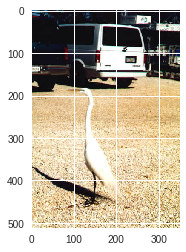

In [7]:
%matplotlib inline
import matplotlib.pyplot as plt
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img

img = load_img('drive/Python/Proyecto2/birds/egret/egr065.jpg')
x = img_to_array(img)
plt.imshow(img)

In [8]:
x.shape

(512, 350, 3)

In [9]:
!ls

datalab  drive


# Verificacion de procesador
El siguiente código verifica donde se ejecutará el código

In [10]:
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 5925391720052050570
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 11285974221
locality {
  bus_id: 1
  links {
  }
}
incarnation: 11160963318487250639
physical_device_desc: "device: 0, name: Tesla K80, pci bus id: 0000:00:04.0, compute capability: 3.7"
]


In [0]:
from numpy.random import seed
seed(1)
from tensorflow import set_random_seed
set_random_seed(2)

# Project 2
## Image Classification with CNN
-------------------------------

## 1. Direct prediction
   * Download the dataset birds from http://www-cvr.ai.uiuc.edu/ponce_grp/data/.
  


 
   Los datos fueron descargados y cargados a la unidad de Google Drive. A continuación el código para cargarlos a python.

In [11]:
datagen = ImageDataGenerator(rescale=1. / 255)
itr = train_generator = datagen.flow_from_directory(
'drive/Python/Proyecto2/birds',
target_size=(224, 224),
batch_size=600,
class_mode='categorical')

Found 600 images belonging to 6 classes.


In [12]:
itr.class_indices

{'egret': 0, 'mandarin': 1, 'owl': 2, 'puffin': 3, 'toucan': 4, 'wood_duck': 5}

In [13]:
X, y = itr.next()
print(X.shape, y.shape)

(600, 224, 224, 3) (600, 6)


### Partición en Train y Test

In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=31415)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(402, 224, 224, 3) (198, 224, 224, 3) (402, 6) (198, 6)


   * Use [Keras](https://keras.io/) and a CNN from Keras [Applications](https://keras.io/applications/) pretrained on ImageNet, to classify the images in the birds dataset. Construct a confusion matrix that relates the bird classes with the 10 most frequent classes from ImageNet predicted by the model.

### Carga del modelo MobileNet

   
 A continuación se descargará el modelo [MobileNet](https://keras.io/applications/#mobilenet)

In [0]:
import numpy as np
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dropout, Flatten, Dense
from keras import applications
from keras import optimizers

model = applications.MobileNet(weights='imagenet')
# Las dimensiones de la imagen deben ser (224, 224, 3)
# Las imagenes de las aves son (320,320,3)


### Clasificación de las aves con MobileNet

In [0]:
y_pred=model.predict(X)

In [17]:
from keras.applications.resnet50 import decode_predictions
pred_class=decode_predictions(y_pred, top=1)

40960/35363 [==================================] - 0s 1us/step


## Construcción de la Matriz de Confusión

In [0]:
cate_pred=[]

for i in range(600):
    categ=pred_class[i][0][1]
    cate_pred.append(categ)

cate_pred=np.array(cate_pred)

In [0]:
tmp=np.array(['egret','mandarin','owl','puffin','toucan','wood duck'])
cate_ori=np.repeat(tmp, 100, axis=0)

In [20]:
import pandas as pd

uni_tmp={"Categoria":cate_ori, "Predicho":cate_pred}
data_tmp=pd.DataFrame(uni_tmp)
data_tmp.head(3)

,Categoria,Predicho
0,egret,drake
1,egret,king_penguin
2,egret,drake


In [21]:
n_top=10
from collections import Counter
c = Counter(cate_pred)
top_list=c.most_common(n_top)

top10=[]
for i in range(n_top):
  cat=top_list[i][0]
  top10.append(cat)

data_mc=data_tmp[data_tmp['Predicho'].isin(top10)]
data_mc.head(3)

,Categoria,Predicho
0,egret,drake
1,egret,king_penguin
2,egret,drake



Se puede concluir que las 10 cases predichas mas frecuentes corresponden efectivamente a tipos de aves, por lo cual se continuará que la red Mobilnet será útil para la solución del problema.


In [0]:
from sklearn.metrics import confusion_matrix, classification_report
mc=confusion_matrix(data_mc["Categoria"],data_mc["Predicho"])

In [0]:
def plot_confusion_matrix(cm, classes, cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title("Matriz de Confusión")
    plt.colorbar()
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.ylabel('Categoria original')
    plt.xlabel('Categoria Predicha')

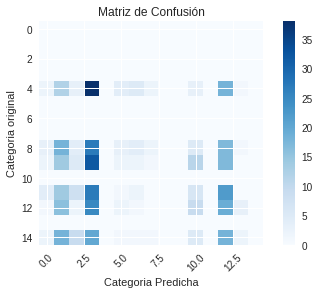

In [24]:
plt.figure
plot_confusion_matrix(mc, ['egret','mandarin','owl','puffin','toucan','wood duck'])

In [25]:
pd.crosstab(data_mc["Categoria"],data_mc["Predicho"], rownames = ['Original'], colnames = ['Predicho'], margins=True)

Predicho,African_grey,American_egret,albatross,drake,goose,great_grey_owl,king_penguin,ptarmigan,toucan,water_ouzel,All
Original,,,,,,,,,,,
egret,2,12,3,38,4,5,2,3,18,1,88
mandarin,3,18,4,27,3,4,2,5,17,1,84
owl,2,14,5,32,2,2,1,11,17,0,86
puffin,4,14,8,27,1,2,0,6,22,0,84
toucan,1,16,2,25,2,1,0,9,19,3,78
wood duck,2,18,9,20,1,1,1,5,18,2,77
All,14,92,31,169,13,15,6,39,111,7,497


In [26]:
pd.crosstab(data_mc["Categoria"],data_mc["Predicho"], rownames = ['Original'], colnames = ['Predicho'], margins=True).apply(lambda r: r/497, axis=1)

Predicho,African_grey,American_egret,albatross,drake,goose,great_grey_owl,king_penguin,ptarmigan,toucan,water_ouzel,All
Original,,,,,,,,,,,
egret,0.004024,0.024145,0.006036,0.076459,0.008048,0.010060,0.004024,0.006036,0.036217,0.002012,0.177062
mandarin,0.006036,0.036217,0.008048,0.054326,0.006036,0.008048,0.004024,0.010060,0.034205,0.002012,0.169014
owl,0.004024,0.028169,0.010060,0.064386,0.004024,0.004024,0.002012,0.022133,0.034205,0.000000,0.173038
puffin,0.008048,0.028169,0.016097,0.054326,0.002012,0.004024,0.000000,0.012072,0.044266,0.000000,0.169014
toucan,0.002012,0.032193,0.004024,0.050302,0.004024,0.002012,0.000000,0.018109,0.038229,0.006036,0.156942
wood duck,0.004024,0.036217,0.018109,0.040241,0.002012,0.002012,0.002012,0.010060,0.036217,0.004024,0.154930
All,0.028169,0.185111,0.062374,0.340040,0.026157,0.030181,0.012072,0.078471,0.223340,0.014085,1.000000


Se puede notar que la clase predicha predominante por MobilNet es **drake** (34%) seguido de la categoría **toucan** (22%) la cual si corresponde a una clase objetivo en el conjunto de datos se los cuales el 27% fueron correctamente clasificados. De manera similar para la categoría **Egret** y **Owl** donde se clasifico correctamente el 16%  como American_egret y great_grey_owl un 2%, respectivamente.

## Discturi los resultados


## 2. Transfer learning



  * Use the pre-trained CNN model as a feature extractor. Create a new model that replaces the top part of the pretrained CNN with two layers of 256 and 6 neurons respectively.

Cargue del modelo MobileNet

In [27]:
model1 = applications.MobileNet(include_top=False, weights='imagenet')

/usr/local/lib/python3.6/dist-packages/keras/applications/mobilenet.py:224: UserWarning: MobileNet shape is undefined. Weights for input shape (224, 224) will be loaded.
  warnings.warn('MobileNet shape is undefined.'


17227776/17225924 [==============================] - 1s 0us/step


Se procede a predecir la clase del ave con el modelo MobileNet sin la capa final.

In [0]:
X_train_IN=model1.predict(X_train)
X_test_IN=model1.predict(X_test)

In [120]:
model2=Sequential()
model2.add(Flatten(input_shape=X_train_IN.shape[1:]))
model2.add(Dense(256, activation='sigmoid'))
model2.add(Dropout(0.5))
model2.add(Dense(6, activation='softmax'))

model2.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_16 (Flatten)         (None, 50176)             0         
_________________________________________________________________
dense_19 (Dense)             (None, 256)               12845312  
_________________________________________________________________
dropout_6 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_20 (Dense)             (None, 6)                 1542      
Total params: 12,846,854
Trainable params: 12,846,854
Non-trainable params: 0
_________________________________________________________________


 * Train the model with the training images from the bird dataset. 

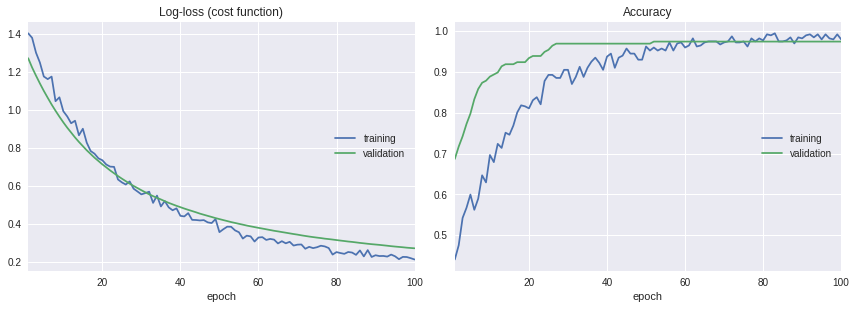

In [122]:
from  livelossplot import PlotLossesKeras

model2.compile(optimizer=optimizers.SGD(lr=0.0001),
               loss='categorical_crossentropy',
               metrics=['accuracy'])

epochs=100

model2.fit(X_train_IN, y_train,
          epochs=epochs,
          validation_data=(X_test_IN, y_test), shuffle=False,
          callbacks=[PlotLossesKeras()])

   * Evaluate the performance over the test dataset reporting the results in a confusion matrix. Discuss the results. 

In [0]:
y_pred2=model2.predict(X_test_IN)

In [0]:
y_pred2_class = np.argmax(y_pred2, axis=1)
y_test_class = np.argmax(y_test, axis=1)

In [0]:
mc2=confusion_matrix(y_test_class, y_pred2_class)

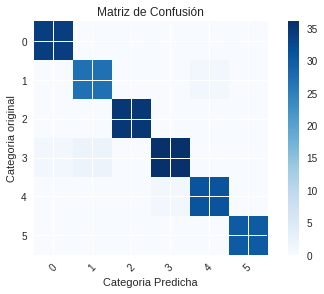

In [137]:
plt.figure
plot_confusion_matrix(mc2, ['egret','mandarin','owl','puffin','toucan','wood duck'])

In [138]:
print(classification_report(y_test_class, y_pred2_class, target_names=['egret','mandarin','owl','puffin','toucan','wood duck']))

             precision    recall  f1-score   support

      egret       0.97      1.00      0.99        34
   mandarin       0.93      0.96      0.95        28
        owl       1.00      1.00      1.00        35
     puffin       0.97      0.92      0.95        39
     toucan       0.97      0.97      0.97        32
  wood duck       1.00      1.00      1.00        30

avg / total       0.97      0.97      0.97       198



Luego de usar el modelo MobileNet ajustado para predecir únicamente las seis categorías de aves de la base de datos se observa que el modelo tiene una precisión global del 97%.

## 3. Fine tuning
* Repeat the experiment from the last question, but this time allow all the layers to be trained.


In [0]:
model_mn = applications.MobileNet(include_top=False, weights='imagenet', input_shape=(224, 224, 3))

for layer in model_mn.layers[:-4]:
    layer.trainable = False

In [132]:
# Create the model
model3 = Sequential()
 
# Add the vgg convolutional base model
model3.add(model_mn)
 
# Add new layers
model3.add(Flatten())
model3.add(Dense(1024, activation='sigmoid'))
model3.add(Dropout(0.5))
model3.add(Dense(6, activation='softmax'))

model3.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
mobilenet_1.00_224 (Model)   (None, 7, 7, 1024)        3228864   
_________________________________________________________________
flatten_19 (Flatten)         (None, 50176)             0         
_________________________________________________________________
dense_25 (Dense)             (None, 1024)              51381248  
_________________________________________________________________
dropout_9 (Dropout)          (None, 1024)              0         
_________________________________________________________________
dense_26 (Dense)             (None, 6)                 6150      
Total params: 54,616,262
Trainable params: 52,438,022
Non-trainable params: 2,178,240
_________________________________________________________________


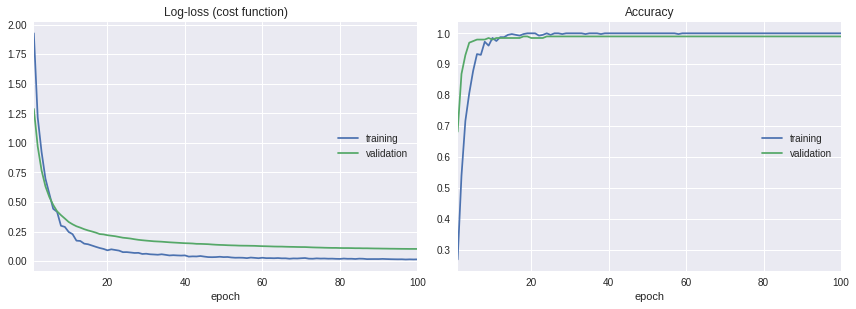

In [133]:
model3.compile(optimizer=optimizers.SGD(lr=0.001),
               loss='categorical_crossentropy',
               metrics=['accuracy'])

epochs=100

model3.fit(X_train, y_train,
          epochs=epochs,
          validation_data=(X_test, y_test), shuffle=False,
          callbacks=[PlotLossesKeras()])

In [0]:
y_pred3=model3.predict(X_test)

In [0]:
y_pred3_class = np.argmax(y_pred3, axis=1)

In [0]:
mc3=confusion_matrix(y_test_class, y_pred3_class)

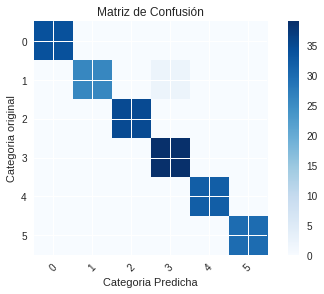

In [147]:
plt.figure
plot_confusion_matrix(mc3, ['egret','mandarin','owl','puffin','toucan','wood duck'])

* Compare and discuss the results.

In [148]:
print(classification_report(y_test_class, y_pred3_class, target_names=['egret','mandarin','owl','puffin','toucan','wood duck']))

             precision    recall  f1-score   support

      egret       1.00      1.00      1.00        34
   mandarin       1.00      0.93      0.96        28
        owl       1.00      1.00      1.00        35
     puffin       0.95      1.00      0.97        39
     toucan       1.00      1.00      1.00        32
  wood duck       1.00      1.00      1.00        30

avg / total       0.99      0.99      0.99       198



Luego de usar el modelo MobileNet ajustado para predecir únicamente las seis categorías de aves de la base de datos se observa que el modelo tiene una precisión global del 99%, es decir, una ganancia de 2% de presición